<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/HW12/20201201_imagesegwKMInsgtructions_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# your  imports
from __future__ import print_function
import os
import sys
import numpy as np
import pylab as pl
import scipy.ndimage as nd
import glob
pl.rcParams['font.size'] = 20

import imageio
#import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/Shareddrives/PUS2020/

/content/drive/Shareddrives/PUS2020


 read in an image of madrid stored in the PUS2020 shared drive as "data/Madrid.jpg" and preprocess it appropriately for clustering

In [4]:
op = imageio.imread("data/Madrid.jpg")

In [5]:
op

Array([[[186, 126,  92],
        [152, 149, 140],
        [169, 165, 154],
        ...,
        [ 75,  67,  56],
        [140, 114,  91],
        [124, 104,  97]],

       [[207, 158, 128],
        [160, 155, 136],
        [ 69,  87,  89],
        ...,
        [130,  99,  68],
        [ 89,  82,  64],
        [ 57,  50,  42]],

       [[224, 182, 160],
        [155, 156, 140],
        [ 31,  50,  56],
        ...,
        [149, 107,  83],
        [176, 126,  93],
        [148, 111,  84]],

       ...,

       [[ 58,  50,  37],
        [ 66,  69,  38],
        [143, 121,  71],
        ...,
        [109, 118,  73],
        [201, 171, 135],
        [175, 158, 128]],

       [[ 36,  43,  25],
        [ 51,  59,  46],
        [ 75,  90,  61],
        ...,
        [165, 155, 128],
        [202, 175, 145],
        [207, 180, 150]],

       [[ 16,  39,  19],
        [ 26,  53,  38],
        [ 34,  66,  43],
        ...,
        [195, 164, 136],
        [179, 149, 121],
        [192, 151, 121]]

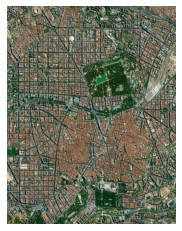

In [6]:
pl.imshow(op)
pl.axis('off');

In [7]:
from sklearn.cluster  import KMeans

In [8]:
# make sure the image only contains 3 color channels:
op.shape

(1000, 774, 3)

In [9]:
import sklearn

In [10]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
op_norm = NormalizeData(op)
op_norm

Array([[[0.72941176, 0.49411765, 0.36078431],
        [0.59607843, 0.58431373, 0.54901961],
        [0.6627451 , 0.64705882, 0.60392157],
        ...,
        [0.29411765, 0.2627451 , 0.21960784],
        [0.54901961, 0.44705882, 0.35686275],
        [0.48627451, 0.40784314, 0.38039216]],

       [[0.81176471, 0.61960784, 0.50196078],
        [0.62745098, 0.60784314, 0.53333333],
        [0.27058824, 0.34117647, 0.34901961],
        ...,
        [0.50980392, 0.38823529, 0.26666667],
        [0.34901961, 0.32156863, 0.25098039],
        [0.22352941, 0.19607843, 0.16470588]],

       [[0.87843137, 0.71372549, 0.62745098],
        [0.60784314, 0.61176471, 0.54901961],
        [0.12156863, 0.19607843, 0.21960784],
        ...,
        [0.58431373, 0.41960784, 0.3254902 ],
        [0.69019608, 0.49411765, 0.36470588],
        [0.58039216, 0.43529412, 0.32941176]],

       ...,

       [[0.22745098, 0.19607843, 0.14509804],
        [0.25882353, 0.27058824, 0.14901961],
        [0.56078431, 0

In [11]:
# change to black and white
op_black = op_norm.mean(-1)

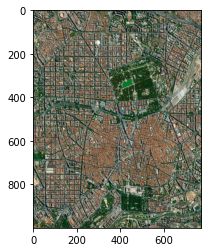

In [12]:
pl.imshow(op_norm)

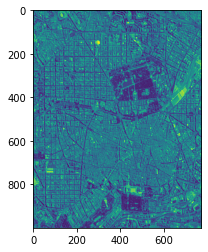

In [13]:
pl.imshow(op_black)

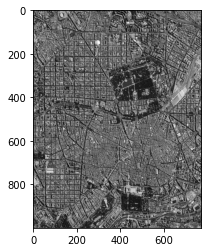

In [14]:
pl.imshow(op_black, cmap="gray")

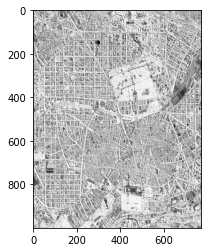

In [15]:
pl.imshow(op_black, cmap="Greys")

In [16]:
# preprocess the image with the sklearn.preprocessing.minmax_scale option: we want wach color channel to be in the range 0-1
from sklearn import preprocessing
#from sklearn.preprocessing import minmax_scale

def min_max_scaling(data, lowerbound_zero=False):
    from sklearn.preprocessing import minmax_scale
    size = data.shape
    data = data/255.0
    if not lowerbound_zero:
        data = (data *2.0)-1.0
    data[np.isnan(data)] = 0
    # if (len(size)==4):
    #     for i in range(size[3]):
    #         tmp = minmax_scale(data[:,:,:,i].reshape(-1, size[1]*size[2]),
    #                            feature_range = (s, t), axis=1)
    #         data[:,:,:,i] = tmp.reshape(-1,size[1],size[2])
    # elif (len(size)==3):
    #    data = minmax_scale(data.reshape(-1, size[1]*size[2]), axis=1)
    #    data = data.reshape(-1, size[1],size[2])
    return data 

Xopscaled = min_max_scaling(op)
Xopscaled

Array([[[ 0.45882353, -0.01176471, -0.27843137],
        [ 0.19215686,  0.16862745,  0.09803922],
        [ 0.3254902 ,  0.29411765,  0.20784314],
        ...,
        [-0.41176471, -0.4745098 , -0.56078431],
        [ 0.09803922, -0.10588235, -0.28627451],
        [-0.02745098, -0.18431373, -0.23921569]],

       [[ 0.62352941,  0.23921569,  0.00392157],
        [ 0.25490196,  0.21568627,  0.06666667],
        [-0.45882353, -0.31764706, -0.30196078],
        ...,
        [ 0.01960784, -0.22352941, -0.46666667],
        [-0.30196078, -0.35686275, -0.49803922],
        [-0.55294118, -0.60784314, -0.67058824]],

       [[ 0.75686275,  0.42745098,  0.25490196],
        [ 0.21568627,  0.22352941,  0.09803922],
        [-0.75686275, -0.60784314, -0.56078431],
        ...,
        [ 0.16862745, -0.16078431, -0.34901961],
        [ 0.38039216, -0.01176471, -0.27058824],
        [ 0.16078431, -0.12941176, -0.34117647]],

       ...,

       [[-0.54509804, -0.60784314, -0.70980392],
        [-0

In [98]:
Xopscaled.shape

(1000, 774, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


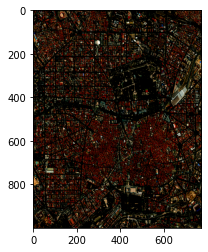

In [17]:
#show the prepreocessed image
pl.imshow(Xopscaled)

## Preprocessing data

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil
import tensorflow as tf

In [56]:
op.shape

(1000, 774, 3)

In [54]:
#Set model
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(1000, 774, 3))

In [57]:
# Preprocessing way1
image = np.array(np.float32(op).reshape(len(op), -1)/255)

print(image.shape)

predictions = model.predict(image.reshape(-1, 1000, 774, 3))
pred_image = predictions.reshape(image.shape[0], -1)

(1000, 2322)


In [99]:
#Preprocessing way 2
image1 = op.reshape((op.shape[0]*op.shape[1], 3))

print(image1.shape)

#predictions = model.predict(image1.reshape(-1, 1000, 774, 3))
#pred_image1 = predictions.reshape(image1.shape[0], -1)

(774000, 3)


In [81]:
#Preprocessing way 3
#h, w, r = op.shape
#trans_op = [[i, j, k, op[i, j, k]] for i in range(h) for j in range(w) for k in range(r)]

#kmeans = KMeans(n_clusters=4).fit(trans_op)
#trans_op_tag = kmeans.predict(trans_op)
#print(kmeans.cluster_centers_)

#for i, e in enumerate(trans_op_tag):
  #x, y = divmod(i, w)
  #r,g,b = (e&4)/4, (e&2)/2, e&1
  #if e&8:
    #r,g,b = 0.5, g, b/2
    #op_process[x,y] = r*255, g*255, b*255

# cluster with k-means in 4 clusters, let the center initialization be whatever sklearn think is best (kmeans++)



In [82]:
nclusters = 4
kmop = KMeans(nclusters)

In [100]:
kmop.fit(image1)
kpredictions = kmop.predict(image1)

print the cluster cluster centers and verbalize what they represent : remember: your features are the R, G, and B channel in the image.

In [101]:
kmop.cluster_centers_

array([[151.28753611, 130.07470773, 106.76083807],
       [ 21.40764496,  48.40713606,  33.72540263],
       [196.18274038, 180.93679806, 159.64134845],
       [ 85.75015111,  95.21697083,  80.9567389 ]])

In [102]:
kmop.labels_

array([0, 0, 2, ..., 2, 0, 0], dtype=int32)

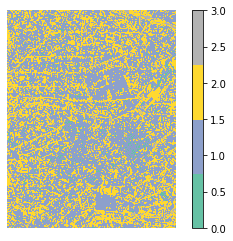

In [104]:
from matplotlib import cm
mycmap = cm.get_cmap('Set2', nclusters)
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()

# identify from the image the cluster containing the green patch on the botton left and assuming the clustering picked up the greenery calculate the fraction of pixels containing vegetation in the image

In [ ]:
print("fraction of vegetation pixel {:.3f}".format(

cluster again, with 4 clusters, but now give it the center corresponding to pure colors:
remember that each pixel color is encoded by the intensity of the R G and B channel:

pure red => RGB=[1,0,0]

pure green => RGB=[0,1,0]

pure blue => RGB=[0,0,1]

also add a pixel centered on black

white: RGB=[1,1,1]

black: RGB=[0,0,0]


In [ ]:
kmop = KMeans(n_clusters=nclusters, init=(...

In [ ]:
kmop.cluster_centers_

In [ ]:
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()
pl.figure()
pl.imshow(op)
pl.axis('off');

In [ ]:
print("fraction of vegetation pixel {:.3f}".format(...

looking at the maps, identify some clusters that were associated with greenery in the first map (same cluster as the big triangular park bottom left) and are not associated with greenery in the second, or viceversa.

discuss the results 

look at the "elbow plot" below: does it suggest a best number of clusters? https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
inertias = []
for i in range(1,6):
  kmop = KMeans(n_clusters=i, random_state=302).fit(Xopscaled)
  inertias.append(kmop.inertia_)

pl.plot(inertias)

repeat the exercize with this image of california after the fires: what is the fraction of forest that burned in this image?

In [ ]:
forest = io.imread("data/kalbar_drone_190113-768x512.jpg") 

In [ ]:
pl.imshow(forest)